In [28]:
import numpy as np
import numexpr as ne

num = 10
a = np.random.rand(num, num)
b = np.random.rand(num, num)

In [29]:
timeit 2*a + b**10

8.24 µs ± 16.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [30]:
timeit ne.evaluate("2*a + b**10")

8.22 µs ± 86.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
import time

numpy_time = []
numexpr_time = []
for num in [10, 100, 1000, 10000, 20000, 50000, 100000]:
    a = np.random.rand(num).astype(np.bool8)
    b = np.random.rand(num).astype(np.bool8)
    
    start_time = time.time()
    resa = a | b
    numpy_time.append(time.time() - start_time)
    
    start_time = time.time()
    resb = ne.evaluate("a | b")
    numexpr_time.append(time.time() - start_time)
    
    print(np.allclose(resa, resb))

True
True
True
True
True
True
True


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Time')

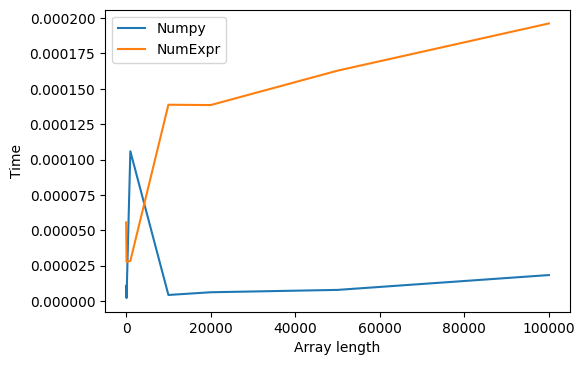

In [26]:
%pylab inline

plt.figure(dpi=100)
plt.plot([10, 100, 1000, 10000, 20000, 50000, 100000], numpy_time)
plt.plot([10, 100, 1000, 10000, 20000, 50000, 100000], numexpr_time)
plt.legend(['Numpy', 'NumExpr'])
plt.xlabel('Array length')
plt.ylabel('Time')

True